In [8]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [9]:
import numpy as np
from scipy.interpolate import interp1d


xs = [0, 20, 40, 60, 80, 100]
ys = [300, 400, 500, 600, 700, 800]


def resolver_sistema_min_cuadrados(xs, ys, gradiente):
    matriz = []
    vector = []
    for g in gradiente:
        *fila, ind = g(xs, ys)
        matriz.append(fila)
        vector.append(ind)
    return np.linalg.solve(matriz, vector)

#  FUNCIONES DE DERIVADAS 
def der_parcial_4(xs, ys):
    c_4=c_3=c_2=c_1=c_0=c_ind=0
    for x, y in zip(xs, ys):
        c_4+=x**8; c_3+=x**7; c_2+=x**6; c_1+=x**5; c_0+=x**4; c_ind+=(x**4)*y
    return (c_4, c_3, c_2, c_1, c_0, c_ind)

def der_parcial_3(xs, ys):
    c_4=c_3=c_2=c_1=c_0=c_ind=0
    for x, y in zip(xs, ys):
        c_4+=x**7; c_3+=x**6; c_2+=x**5; c_1+=x**4; c_0+=x**3; c_ind+=(x**3)*y
    return (c_4, c_3, c_2, c_1, c_0, c_ind)

def der_parcial_2(xs, ys):
    c_4=c_3=c_2=c_1=c_0=c_ind=0
    for x, y in zip(xs, ys):
        c_4+=x**6; c_3+=x**5; c_2+=x**4; c_1+=x**3; c_0+=x**2; c_ind+=(x**2)*y
    return (c_4, c_3, c_2, c_1, c_0, c_ind)

def der_parcial_1(xs, ys):
    c_4=c_3=c_2=c_1=c_0=c_ind=0
    for x, y in zip(xs, ys):
        c_4+=x**5; c_3+=x**4; c_2+=x**3; c_1+=x**2; c_0+=x; c_ind+=x*y
    return (c_4, c_3, c_2, c_1, c_0, c_ind)

def der_parcial_0(xs, ys):
    c_4=c_3=c_2=c_1=c_0=c_ind=0
    for x, y in zip(xs, ys):
        c_4+=x**4; c_3+=x**3; c_2+=x**2; c_1+=x; c_0+=1; c_ind+=y
    return (c_4, c_3, c_2, c_1, c_0, c_ind)


gradiente = [der_parcial_4, der_parcial_3, der_parcial_2, der_parcial_1, der_parcial_0]
a = resolver_sistema_min_cuadrados(xs, ys, gradiente)

print(" coeficientes ")
for i in range(len(a)):

    print(f'a_{4-i} = {a[i]}')


f_interp = interp1d(xs, ys, kind='cubic')
y_estimado = f_interp(xs)
errores_relativos = np.abs((ys - y_estimado) / (np.abs(ys) + 1e-18))


 coeficientes 
a_4 = -6.97818851608919e-18
a_3 = 1.425201992575744e-15
a_2 = -9.030698354744183e-14
a_1 = 5.000000000001772
a_0 = 299.99999999999716


In [10]:
print(f"\n  errores ")
print(f"minimo:  {np.min(errores_relativos):.5e}")
print(f"maximo:  {np.max(errores_relativos):.5e}")
print(f"error relativo promedio: {np.mean(errores_relativos):.5e}")


  errores 
minimo:  0.00000e+00
maximo:  1.89478e-16
error relativo promedio: 5.05275e-17


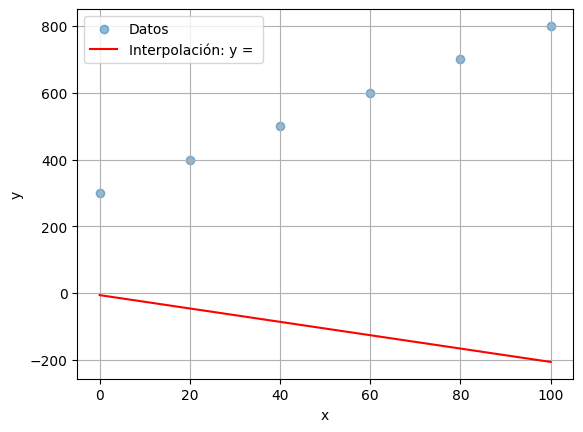

In [11]:
# Reemplace con la función obtenida de ajustar_min_cuadrados
interpolacion = lambda x: -2 * x - 6
# --- Función de ejemplo

import matplotlib.pyplot as plt
import numpy as np

# Dibujar los puntos x, y
plt.scatter(xs, ys, alpha=0.5, label="Datos")

# Dibujar la función de aproximación
x_aprox = np.linspace(min(xs), max(xs), 100)
y_aprox = [interpolacion(xi) for xi in x_aprox]
plt.plot(x_aprox, y_aprox, "r-", label="Interpolación: y = ")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()